In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
print("Number of rows: {} \nNumber of columns: {}".format(data.shape[0],data.shape[1]))

Number of rows: 5110 
Number of columns: 12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 12

Text(0.5, 1.0, 'Plot 3')

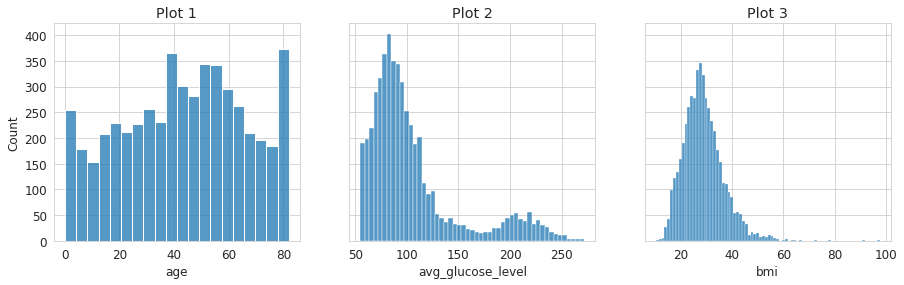

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,4),sharey=True)
sns.histplot(data['age'] , ax=axes[0]).set_title("Plot 1")
sns.histplot(data['avg_glucose_level'] , ax=axes[1]).set_title("Plot 2")
sns.histplot(data['bmi'] , ax=axes[2]).set_title("Plot 3")

In [ ]:
data.drop(data[data['age'] == 80].index, inplace = True)

In [ ]:
data.shape

(5040, 12)

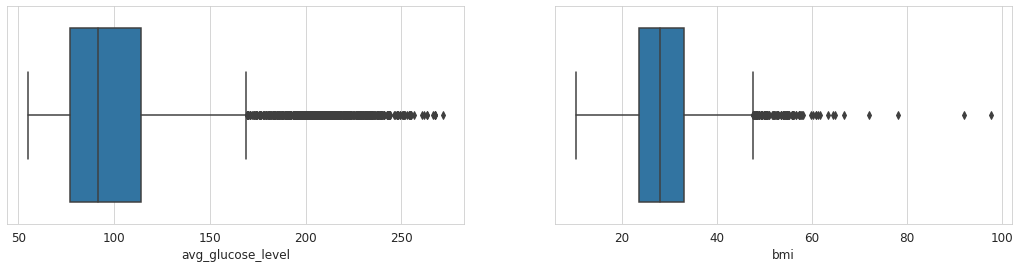

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (18,4))
sns.boxplot(x = 'avg_glucose_level', ax = axes[0], data = data)
sns.boxplot(x = 'bmi', ax = axes[1], data = data)

In [ ]:
data_out = data[['id','avg_glucose_level', 'bmi']]

In [ ]:
from scipy import stats

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                   36837.750
age                     35.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       36.565
bmi                      9.600
stroke                   0.000
dtype: float64


In [ ]:
data_o = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


In [ ]:
data.shape

(5040, 12)

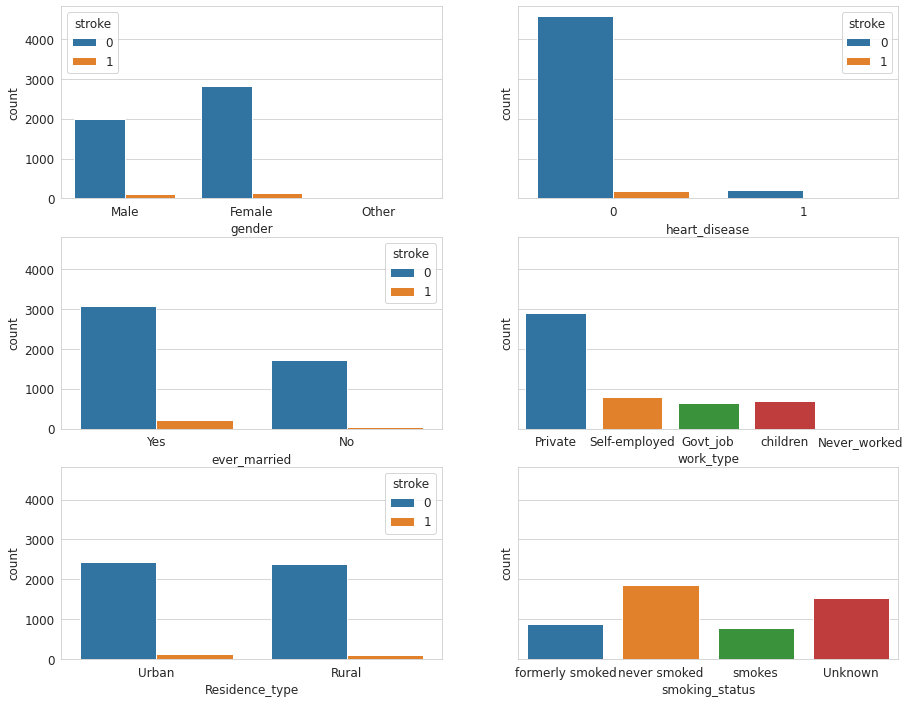

In [ ]:
fig, axes = plt.subplots(3,2, figsize=(15,12),sharey=True)
sns.countplot(x = 'gender',hue = 'stroke',data = data, ax = axes[0,0])
sns.countplot(x = 'heart_disease',hue = 'stroke',data = data, ax = axes[0,1])
sns.countplot(x = 'ever_married',hue = 'stroke', data = data, ax = axes[1,0])
sns.countplot(x = 'Residence_type', hue = 'stroke', data = data, ax = axes[2,0])
sns.countplot(x = data['smoking_status'], ax = axes[2,1])
sns.countplot(x = data['work_type'], ax = axes[1,1])

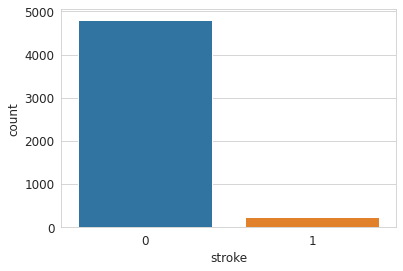

In [ ]:
sns.countplot(x = data['stroke'])

In [ ]:
data = data.drop('id', axis = 1)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
corr_matrix = data.corr(method='pearson')

In [ ]:
corr_matrix['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.237049
avg_glucose_level    0.135666
heart_disease        0.128985
hypertension         0.119819
bmi                  0.042906
Name: stroke, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5040 non-null   object 
 1   age                5040 non-null   float64
 2   hypertension       5040 non-null   int64  
 3   heart_disease      5040 non-null   int64  
 4   ever_married       5040 non-null   object 
 5   work_type          5040 non-null   object 
 6   Residence_type     5040 non-null   object 
 7   avg_glucose_level  5040 non-null   float64
 8   bmi                4842 non-null   float64
 9   smoking_status     5040 non-null   object 
 10  stroke             5040 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 601.5+ KB


In [ ]:
data_obj = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for attr in data_obj:
    data[attr] = data[attr].astype(pd.api.types.CategoricalDtype())
    data[attr] = data[attr].cat.codes

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5040 non-null   int8   
 1   age                5040 non-null   float64
 2   hypertension       5040 non-null   int64  
 3   heart_disease      5040 non-null   int64  
 4   ever_married       5040 non-null   int8   
 5   work_type          5040 non-null   int8   
 6   Residence_type     5040 non-null   int8   
 7   avg_glucose_level  5040 non-null   float64
 8   bmi                4842 non-null   float64
 9   smoking_status     5040 non-null   int8   
 10  stroke             5040 non-null   int64  
dtypes: float64(3), int64(3), int8(5)
memory usage: 429.3 KB
None


In [ ]:
corr_matrix = data.corr(method='spearman')
corr_matrix['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.241182
heart_disease        0.128985
hypertension         0.119819
ever_married         0.104522
avg_glucose_level    0.088768
bmi                  0.055847
smoking_status       0.025629
Residence_type       0.013732
gender               0.009352
work_type           -0.027869
Name: stroke, dtype: float64

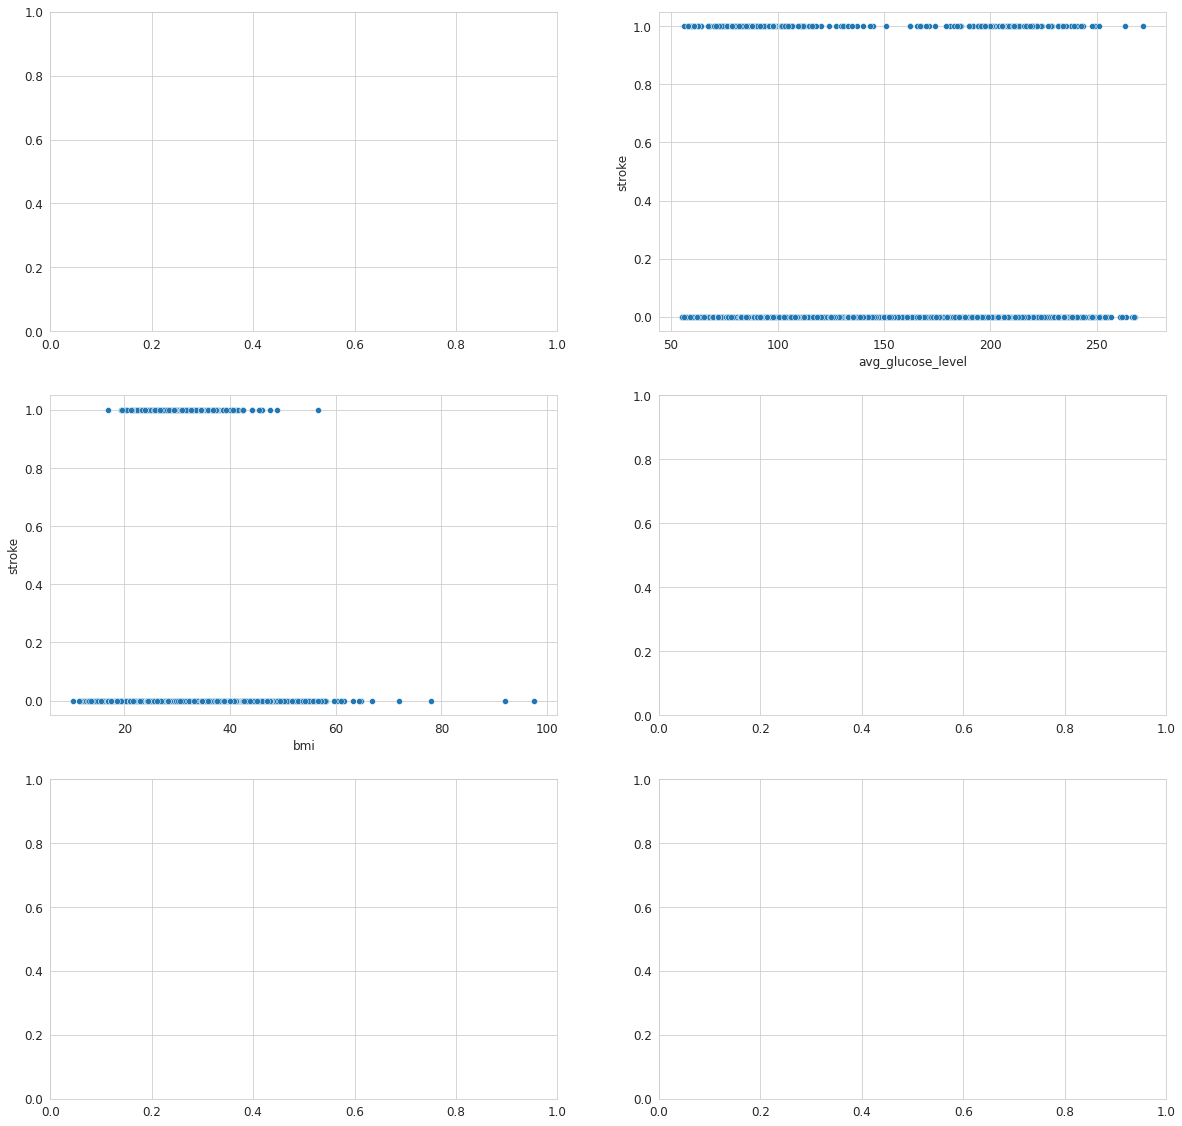

In [ ]:
fig, ax = plt.subplots(3, 2, figsize = (20,20))
sns.scatterplot(x = 'avg_glucose_level', y = 'stroke', ax = ax[0,1], data = data)
sns.scatterplot(x = 'bmi', y = 'stroke', ax = ax[1,0], data = data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


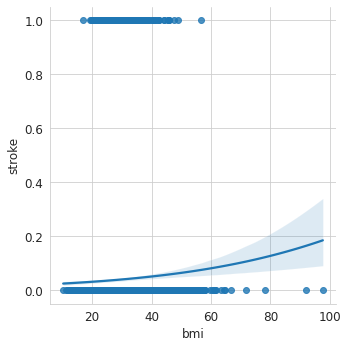

In [ ]:
sns.lmplot(x = 'bmi', y = 'stroke',logistic = True, data = data)